In [99]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold


In [100]:
bank = pd.read_csv("bank-full.csv", sep=";")
print(bank.shape)
bank.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
"""
Number of rows and columns of the dataframe is checked.
"""
print("Number of rows: ", bank.shape[0])
print("Number of columns: ", bank.shape[1])

Number of rows:  45211
Number of columns:  17


In [126]:
"""
Data type of all the columns are checked.
"""
j = 0
for col in bank.columns:
    j += 1
    print(j, "Column: ", col, " ---> Type: ", bank[col].dtypes)
print(bank.columns)

1 Column:  age  ---> Type:  int64
2 Column:  job  ---> Type:  object
3 Column:  marital  ---> Type:  object
4 Column:  education  ---> Type:  object
5 Column:  default  ---> Type:  object
6 Column:  balance  ---> Type:  int64
7 Column:  housing  ---> Type:  object
8 Column:  loan  ---> Type:  object
9 Column:  contact  ---> Type:  object
10 Column:  day  ---> Type:  int64
11 Column:  month  ---> Type:  object
12 Column:  duration  ---> Type:  int64
13 Column:  campaign  ---> Type:  int64
14 Column:  pdays  ---> Type:  int64
15 Column:  previous  ---> Type:  int64
16 Column:  poutcome  ---> Type:  object
17 Column:  y  ---> Type:  object
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [73]:
"""
The columns are checked if they  are continuous or categorical using .describe or .value_counts 
and by taking a quick look at the features.
"""
j = 0
for col in bank.columns:
    j += 1
    res_col1 = bank[col].describe()
    res_col2 = bank[col].value_counts()
    print(j, "Describe the column: \n", res_col1)
    print("-------------------------------------\n")
    print("Value counts of the column: \n", res_col2)
    print("------------------------------------\n")

1 Describe the column: 
 count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
-------------------------------------

Value counts of the column: 
 32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
------------------------------------

2 Describe the column: 
 count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object
-------------------------------------

Value counts of the column: 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------

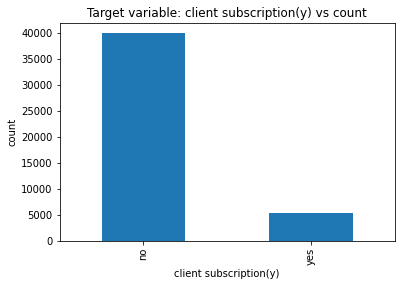

In [74]:
pd.value_counts(bank['y']).plot.bar()
plt.ylabel('count')
plt.xlabel('client subscription(y)')
plt.title("Target variable: client subscription(y) vs count")
plt.show()

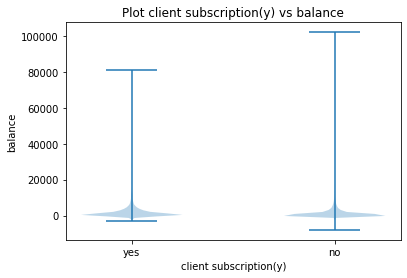

In [46]:
dataset = [bank[bank['y']=='yes']['balance'].values,
           bank[bank['y']=='no']['balance'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('balance')
plt.xlabel('client subscription(y)')
plt.title("Plot client subscription(y) vs balance")
plt.show()

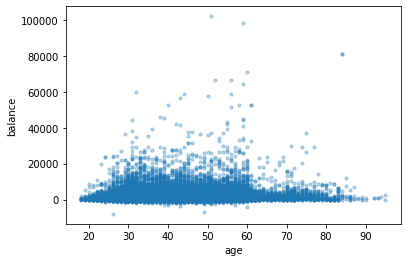

In [125]:
bank.plot.scatter('age','balance',alpha=0.3,s=10)
plt.title('age vs balance')
plt.show()

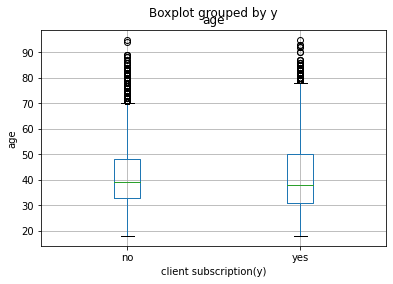

In [93]:
bank[['age','y']].boxplot(by='y')
plt.ylabel('age')
plt.xlabel('client subscription(y)')
# plt.title('Plot client subscription(y) vs age')
plt.show()

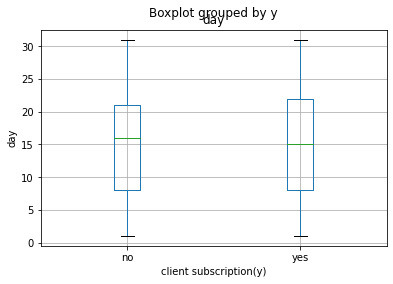

In [94]:
bank[['day','y']].boxplot(by='y')
plt.ylabel('day')
plt.xlabel('client subscription(y)')
# plt.title('Plot client subscription(y) vs day')
plt.show()

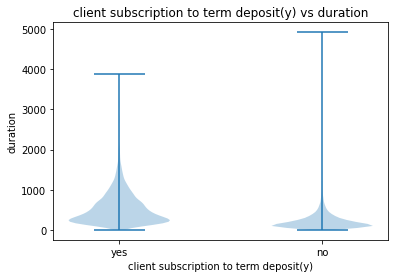

In [129]:
dataset = [bank[bank['y']=='yes']['duration'].values,
           bank[bank['y']=='no']['duration'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('duration')
plt.xlabel('client subscription to term deposit(y)')
plt.title("client subscription to term deposit(y) vs duration")
plt.show()

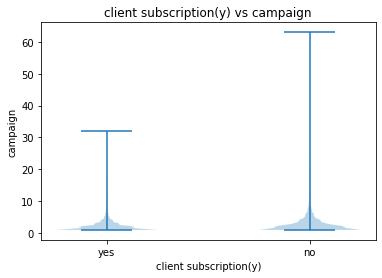

In [76]:
dataset = [bank[bank['y']=='yes']['campaign'].values,
           bank[bank['y']=='no']['campaign'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('campaign')
plt.xlabel('client subscription(y)')
plt.title("client subscription(y) vs campaign")
plt.show()

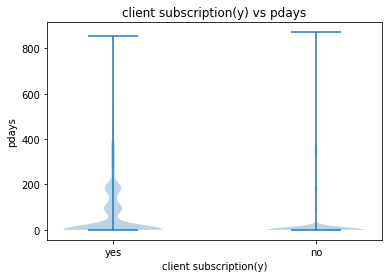

In [77]:
dataset = [bank[bank['y']=='yes']['pdays'].values,
           bank[bank['y']=='no']['pdays'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('pdays')
plt.xlabel('client subscription(y)')
plt.title("client subscription(y) vs pdays")
plt.show()

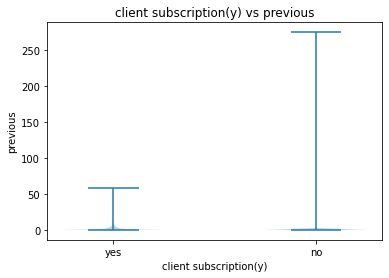

In [78]:
dataset = [bank[bank['y']=='yes']['previous'].values,
           bank[bank['y']=='no']['previous'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.ylabel('previous')
plt.xlabel('client subscription(y)')
plt.title("client subscription(y) vs previous")
plt.show()


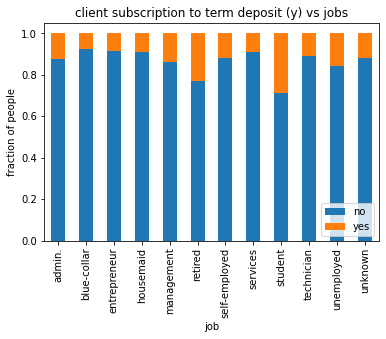

In [127]:
count_matrix = bank.groupby(['job', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription to term deposit (y) vs jobs")
plt.show()

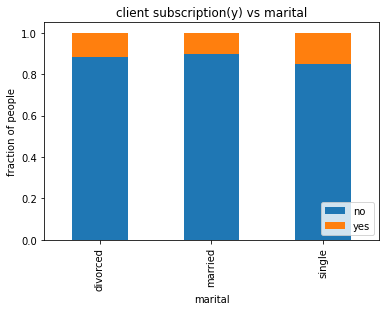

In [80]:
count_matrix = bank.groupby(['marital', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs marital")
plt.show()

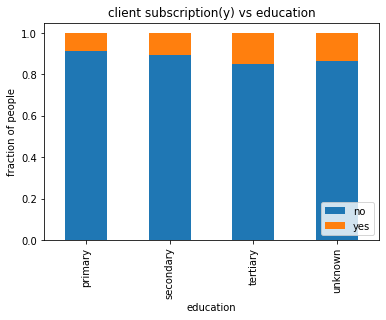

In [81]:
count_matrix = bank.groupby(['education', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs education")
plt.show()

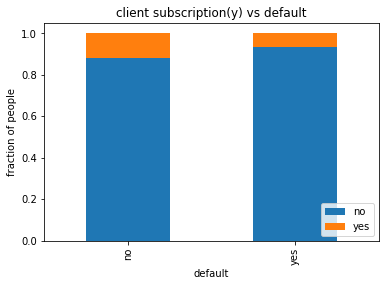

In [82]:
count_matrix = bank.groupby(['default', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs default")
plt.show()

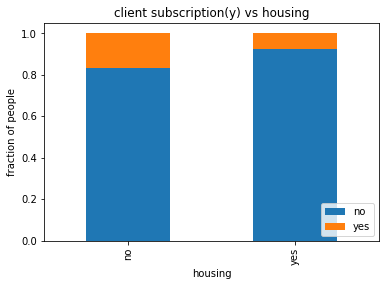

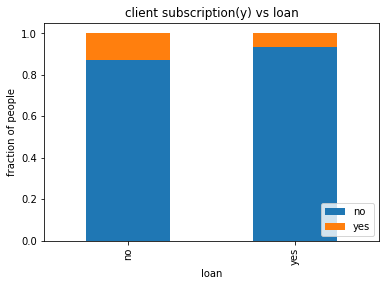

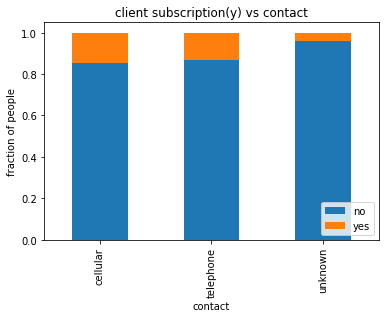

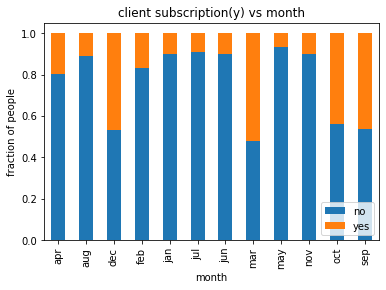

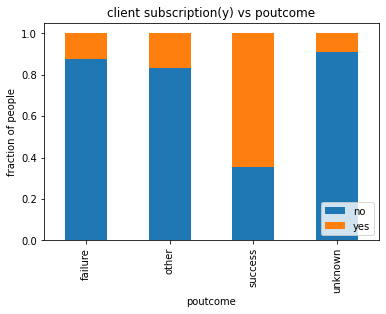

In [83]:
count_matrix = bank.groupby(['housing', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs housing")
plt.show()

count_matrix = bank.groupby(['loan', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs loan")
plt.show()

count_matrix = bank.groupby(['contact', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs contact")
plt.show()

count_matrix = bank.groupby(['month', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs month")
plt.show()

count_matrix = bank.groupby(['poutcome', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people')
plt.legend(loc=4)
plt.title("client subscription(y) vs poutcome")
plt.show()

In [101]:
"""
The target variable and other columns are seperated. 
"""
y = bank['y'] 
X = bank.loc[:, bank.columns != 'y']

In [102]:
"""
Missing values in the columns are checked below. 
"""
print('data dimensions:',bank.shape)
perc_missing_per_ftr = bank.isnull().sum(axis=0)/bank.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(bank[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(bank.isnull().sum(axis=1)!=0)/bank.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (45211, 17)
fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


In [118]:
"""
stratified splits are used to split imbalanced data.
The Dataset is split into Training, Validation and Testing sets.
Random seed of 42 is taken.
The features are identified as categorical or continuous. Based on that we apply respective transformers.
Then we fit transform the training data and transform the validation and testing data. We can see that it is reproducable 
due to the random seed.
"""
random_state = 42

X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',y_test.value_counts(normalize=True),"\n")

    
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    ordinal_ftrs = ['education','month','poutcome'] 
    ordinal_cats = [['unknown','primary','secondary','tertiary'],['jan','feb','mar','apr','may','jun','jul','aug',\
                    'sep','oct','nov','dec'],['unknown','other','failure','success']]
    onehot_ftrs = ['job','marital','default','housing','loan','contact']
    minmax_ftrs = ['age']
    std_ftrs = ['balance','day','duration','campaign','pdays','previous']
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('minmax', MinMaxScaler(), minmax_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)]) 
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

print("X_train shape: \n", X_train.shape, "\n")
print("X_train_prep shape :\n", X_train_prep.shape, "\n")
print("X_val_prep shape: \n", X_val_prep.shape, "\n")
print("X_test_prep shape", X_test_prep.shape, "\n")
print("X_train_prep :\n", X_train_prep, "\n")
print("X_val_prep: \n", X_val_prep,"\n")
print("X_test_prep: \n",X_test_prep, "\n")


test balance: no     0.883003
yes    0.116997
Name: y, dtype: float64 

X_train shape: 
 (28935, 16) 

X_train_prep shape :
 (28935, 34) 

X_val_prep shape: 
 (7233, 34) 

X_test_prep shape (9043, 34) 

X_train_prep :
 [[ 2.          7.          0.         ... -0.24455887 -0.4093447
  -0.23157473]
 [ 2.          3.          2.         ...  0.40038379  1.4507462
   2.5706898 ]
 [ 2.          7.          0.         ...  0.40038379 -0.4093447
  -0.23157473]
 ...
 [ 2.          6.          0.         ... -0.5670302  -0.4093447
  -0.23157473]
 [ 3.          4.          0.         ... -0.5670302  -0.4093447
  -0.23157473]
 [ 0.          6.          2.         ... -0.24455887  2.71080777
   2.9710133 ]] 

X_val_prep: 
 [[ 2.          6.          0.         ...  2.65768312 -0.4093447
  -0.23157473]
 [ 3.          5.          0.         ... -0.24455887 -0.4093447
  -0.23157473]
 [ 2.          6.          0.         ...  0.40038379 -0.4093447
  -0.23157473]
 ...
 [ 2.          4.          0.    